<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Reemplazar_por_valores_num%C3%A9ricos_normales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Reemplazar

Reemplazar los valores numnéricos por valores normales.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Tal vez se use
from scipy import stats # estadísticos

import math

In [ ]:
def f_cargar_datos(ruta_archivo, tipo='csv', hoja_excel=None, separador=','):
    """
    Carga datos desde un archivo especificado.

    Parámetros:
    - ruta_archivo (str): Ruta del archivo a cargar.
    - tipo (str): Tipo de archivo a cargar ('csv', 'excel', 'txt'). Por defecto es 'csv'.
    - hoja_excel (str): Nombre o índice de la hoja, en caso de ser un archivo Excel. Por defecto es None.
    - separador (str): Separador para archivos de texto o CSV. Por defecto es ','.

    Retorna:
    - DataFrame: Un DataFrame con los datos cargados.
    """
    try:
        if tipo == 'csv':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        elif tipo == 'excel':
            datos = pd.read_excel(ruta_archivo, sheet_name=hoja_excel)
        elif tipo == 'txt':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        else:
            raise ValueError("El tipo de archivo no es soportado. Use 'csv', 'excel' o 'txt'.")

        print("Datos cargados correctamente.")
        return datos

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo}' no se encontró.")
    except Exception as e:
        print(f"Ocurrió un error al cargar los datos: {e}")


def f_eliminar_columnas(datos, columnas):
    """
    Elimina las columnas especificadas de un DataFrame.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columnas (list): Lista de nombres de columnas a eliminar.

    Retorna:
    - DataFrame: El DataFrame sin las columnas especificadas.
    """
    try:
        # Verificar si todas las columnas existen
        columnas_existentes = [col for col in columnas if col in datos.columns]
        if not columnas_existentes:
            print("Ninguna de las columnas especificadas existe en el DataFrame.")
            return datos

        # Eliminar las columnas especificadas
        datos_actualizado = datos.drop(columns=columnas_existentes)
        print(f"Columnas eliminadas correctamente: {columnas_existentes}")
        return datos_actualizado

    except Exception as e:
        print(f"Error al eliminar las columnas: {e}")
        return datos


def f_tabla_frecuencia(datos, columna):
    """
    Genera una tabla de frecuencias para datos cualitativos.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columna (str): El nombre de la columna cualitativa a analizar.

    Retorna:
    - DataFrame: Tabla de frecuencias con columnas de frecuencia absoluta, relativa y acumulada.
    """
    try:
        # Contar frecuencias absolutas
        frecuencia = datos[columna].value_counts().reset_index()
        frecuencia.columns = [columna, 'Frecuencia_Absoluta']

        # Calcular frecuencia relativa y porcentual
        total = frecuencia['Frecuencia_Absoluta'].sum()
        frecuencia['Frecuencia_Relativa'] = frecuencia['Frecuencia_Absoluta'] / total
        frecuencia['Frecuencia_Porcentual'] = frecuencia['Frecuencia_Relativa'] * 100

        # Calcular frecuencias acumuladas
        frecuencia['Frecuencia_Acumulada'] = frecuencia['Frecuencia_Absoluta'].cumsum()
        frecuencia['Frecuencia_Porcentual_Acumulada'] = frecuencia['Frecuencia_Porcentual'].cumsum()

        return frecuencia

    except KeyError:
        print(f"Error: La columna '{columna}' no existe en el DataFrame.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

def f_histograma(datos, variable, barras=10):
    # Convertir la variable a un array para cálculos estadísticos
    valores = np.array(datos[variable])

    # Calcular medidas estadísticas
    media = np.mean(valores)
    mediana = np.median(valores)
    # moda = stats.mode(valores)[0][0]

    # Crear el histograma
    plt.figure(figsize=(8, 6))
    plt.hist(valores, bins=barras, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
    # plt.axvline(moda, color='blue', linestyle='--', label=f'Moda: {moda:.2f}')

    # Etiquetas y título
    plt.title('Histograma con Media, Mediana')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

def f_barra(datos, variable, color='lightblue', mostrar='primeros'):
    # Contar la frecuencia de cada categoría
    frecuencias = datos[variable].value_counts()

    # Verificar cuántas categorías hay
    if len(frecuencias) > 10:
        if mostrar == 'primeros':
            frecuencias = frecuencias.head(10)  # Primeras 10 categorías
        elif mostrar == 'ultimos':
            frecuencias = frecuencias.tail(10)  # Últimas 10 categorías

    # Crear el diagrama de barras
    plt.figure(figsize=(8, 6))
    barras = plt.bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)

    # Agregar etiquetas y título
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.title(f'Diagrama de Barras de {variable} (Mostrando {mostrar} 10)')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización si son largas

    # Mostrar valores encima de cada barra
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(),
                 f'{int(barra.get_height())}', ha='center', va='bottom', fontsize=10)

    # Mostrar el gráfico
    plt.show()

def f_barra_multiple_matriz(datos, variables=None, color='lightblue', mostrar='primeros'):
    # Obtener columnas categóricas si no se especificaron
    if variables is None:
        variables = datos.select_dtypes(include=['object', 'category']).columns.tolist()

    # Determinar la disposición de la matriz según el número de columnas categóricas
    num_columnas = len(variables)
    if num_columnas <= 4:
        filas, columnas = 2, 2
    elif num_columnas <= 9:
        filas, columnas = 3, 3
    elif num_columnas <= 16:
        filas, columnas = 4, 4
    else:
        columnas = 4
        filas = math.ceil(num_columnas / columnas)

    # Crear la figura y subplots
    fig, axes = plt.subplots(filas, columnas, figsize=(columnas * 5, filas * 4))
    axes = axes.flatten()  # Convertir los ejes en una lista para indexar fácilmente

    # Generar gráficos
    for i, variable in enumerate(variables):
        # Contar la frecuencia de cada categoría
        frecuencias = datos[variable].value_counts()

        # Mostrar solo las primeras o últimas 10 categorías si hay más de 10
        if len(frecuencias) > 10:
            if mostrar == 'primeros':
                frecuencias = frecuencias.head(10)
            elif mostrar == 'ultimos':
                frecuencias = frecuencias.tail(10)

        # Dibujar el diagrama de barras en el subplot correspondiente
        axes[i].bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{variable}')
        axes[i].set_xlabel('Categorías')
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)

        # Mostrar valores sobre las barras
        for j, valor in enumerate(frecuencias.values):
            axes[i].text(j, valor, f'{valor}', ha='center', va='bottom', fontsize=8)

    # Ocultar subplots vacíos
    for ax in axes[num_columnas:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



# Función que visualiza múltiples histogramas de variables numéricas
def f_histograma_multiple_matriz(datos, columnas=None, bins=10, color='skyblue'):
    """
    Genera múltiples histogramas organizados en una matriz dependiendo del número de variables numéricas seleccionadas.

    Parámetros:
    datos (pd.DataFrame): DataFrame que contiene los datos.
    columnas (list or None): Lista de columnas a graficar. Si es None, selecciona todas las columnas numéricas.
    bins (int): Número de intervalos para los histogramas.
    color (str): Color de los histogramas.

    Retorno:
    Visualiza múltiples histogramas organizados automáticamente.
    """
    # Si no se especifican columnas, selecciona todas las numéricas
    if columnas is None:
        columnas = datos.select_dtypes(include=['number']).columns.tolist()

    # Determinar el número de filas y columnas (3 o 4 columnas dependiendo del número de variables)
    n_vars = len(columnas)
    n_cols = 4 if n_vars > 6 else 3  # Si hay más de 6 variables, usa 4 columnas
    n_rows = math.ceil(n_vars / n_cols)  # Calcular el número de filas necesarias

    # Configuración de subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Aplanar para fácil iteración

    # Graficar cada variable
    for i, variable in enumerate(columnas):
        axes[i].hist(datos[variable].dropna(), bins=bins, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histograma de {variable}')
        axes[i].set_xlabel(variable)
        axes[i].set_ylabel('Frecuencia')

    # Eliminar subplots vacíos si hay menos gráficos que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:

# https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo.csv
url = "https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo.csv"
datos_cargados = f_cargar_datos(url)
datos_cargados.head(10)
datos_cargados.tail(10)


Datos cargados correctamente.


,ID_Estudiante,Fecha_Registro,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
4990,4991,2024-01-19,24,Casado/a,Foráneo,77.69,53.75,10,3,7,...,Extrovertido,Media,9,Regular,No,4,Pública,21.41,No,Sí
4991,4992,2024-04-13,20,Unión Libre,Foráneo,98.19,56.39,6,4,9,...,Introvertido,Alta,5,Regular,No,2,Privada,33.94,Sí,No
4992,4993,2024-05-09,19,Soltero/a,Foráneo,90.58,56.88,9,1,6,...,Extrovertido,Alta,10,Mala,Sí,4,Privada,14.45,Sí,No
4993,4994,2024-02-22,21,Casado/a,Foráneo,77.70,95.19,6,1,1,...,Introvertido,Alta,10,Buena,No,4,Privada,4.16,Sí,Sí
4994,4995,2024-05-28,25,Unión Libre,Local,97.24,83.93,8,2,7,...,Extrovertido,Baja,10,Buena,Sí,2,Pública,11.31,No,No
4995,4996,2024-02-15,18,Casado/a,Local,63.58,68.32,1,0,17,...,Extrovertido,Baja,9,Regular,Sí,2,Pública,17.66,No,No
4996,4997,2024-05-01,19,Casado/a,Local,84.27,76.91,9,1,2,...,Introvertido,Baja,6,Buena,Sí,0,Pública,35.78,No,No
4997,4998,2024-05-26,22,Unión Libre,Local,81.39,73.60,1,5,12,...,Extrovertido,Baja,8,Buena,No,1,Pública,37.48,No,Sí
4998,4999,2024-06-16,22,Casado/a,Foráneo,80.90,63.64,8,5,7,...,Extrovertido,Baja,6,Mala,No,5,Privada,39.84,No,Sí
4999,5000,2024-02-11,19,Unión Libre,Foráneo,95.02,85.82,4,5,16,...,Introvertido,Baja,9,Buena,No,0,Pública,39.39,Sí,No


Reemplazar


In [ ]:
# Seleccionar columnas numéricas
columnas_numericas = datos_cargados.select_dtypes(include=['number']).columns.tolist()

# Reemplazar valores con datos generados a partir de una distribución normal
for columna in columnas_numericas:
    media = datos_cargados[columna].mean()  # Calcular la media
    std = datos_cargados[columna].std()  # Calcular la desviación estándar
    datos_cargados[columna] = np.random.normal(loc=media, scale=std, size=len(datos_cargados)).astype(int)



In [ ]:
datos_cargados.head(10)
datos_cargados.tail(10)

,ID_Estudiante,Fecha_Registro,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
4990,2685,2024-01-19,20,Casado/a,Foráneo,87,80,4,1,2,...,Extrovertido,Media,9,Regular,No,2,Pública,19,No,Sí
4991,4307,2024-04-13,21,Unión Libre,Foráneo,51,112,4,4,8,...,Introvertido,Alta,7,Regular,No,3,Privada,37,Sí,No
4992,2464,2024-05-09,18,Soltero/a,Foráneo,93,74,0,1,14,...,Extrovertido,Alta,9,Mala,Sí,1,Privada,22,Sí,No
4993,2229,2024-02-22,23,Casado/a,Foráneo,77,98,3,5,6,...,Introvertido,Alta,4,Buena,No,2,Privada,40,Sí,Sí
4994,1063,2024-05-28,19,Unión Libre,Local,80,64,1,2,9,...,Extrovertido,Baja,8,Buena,Sí,1,Pública,35,No,No
4995,904,2024-02-15,19,Casado/a,Local,62,54,4,-1,16,...,Extrovertido,Baja,6,Regular,Sí,3,Pública,14,No,No
4996,2007,2024-05-01,22,Casado/a,Local,97,63,11,4,8,...,Introvertido,Baja,6,Buena,Sí,4,Pública,14,No,No
4997,3310,2024-05-26,22,Unión Libre,Local,72,64,2,0,10,...,Extrovertido,Baja,5,Buena,No,2,Pública,22,No,Sí
4998,2300,2024-06-16,23,Casado/a,Foráneo,58,76,2,2,17,...,Extrovertido,Baja,9,Mala,No,3,Privada,23,No,Sí
4999,2843,2024-02-11,18,Unión Libre,Foráneo,89,90,10,6,8,...,Introvertido,Baja,5,Buena,No,1,Pública,29,Sí,No


## Datos transformados


In [ ]:
# Copia de los datos
datos_transformados = datos_cargados.copy()
n = len(datos_transformados)
print(f"El DataFrame tiene {n} filas.")

El DataFrame tiene 5000 filas.


# Modificar algunos valores cualitativos

Se busca hacer menos homogeneos los valores en los datos cateróricos, tal vez con mayor frecuncia algunos valores dado la percepción.



['Fecha_Registro', 'Estado_Civil', 'Lugar_Residencia', 'Nivel_Socioeconomico', 'Apoyo_Financiero', 'Empleo_Parcial_o_Tiempo_Completo', 'Red_Apoyo_Social', 'Participacion_Extracurricular', 'Relaciones_Interpersonales', 'Problemas_Emocionales', 'Adaptacion_Entorno_Escolar', 'Personalidad', 'Autoeficacia_Academica', 'Condiciones_Salud', 'Problemas_Familiares', 'Tipo_Institucion', 'Acceso_Servicios_Basicos', 'Desercion']


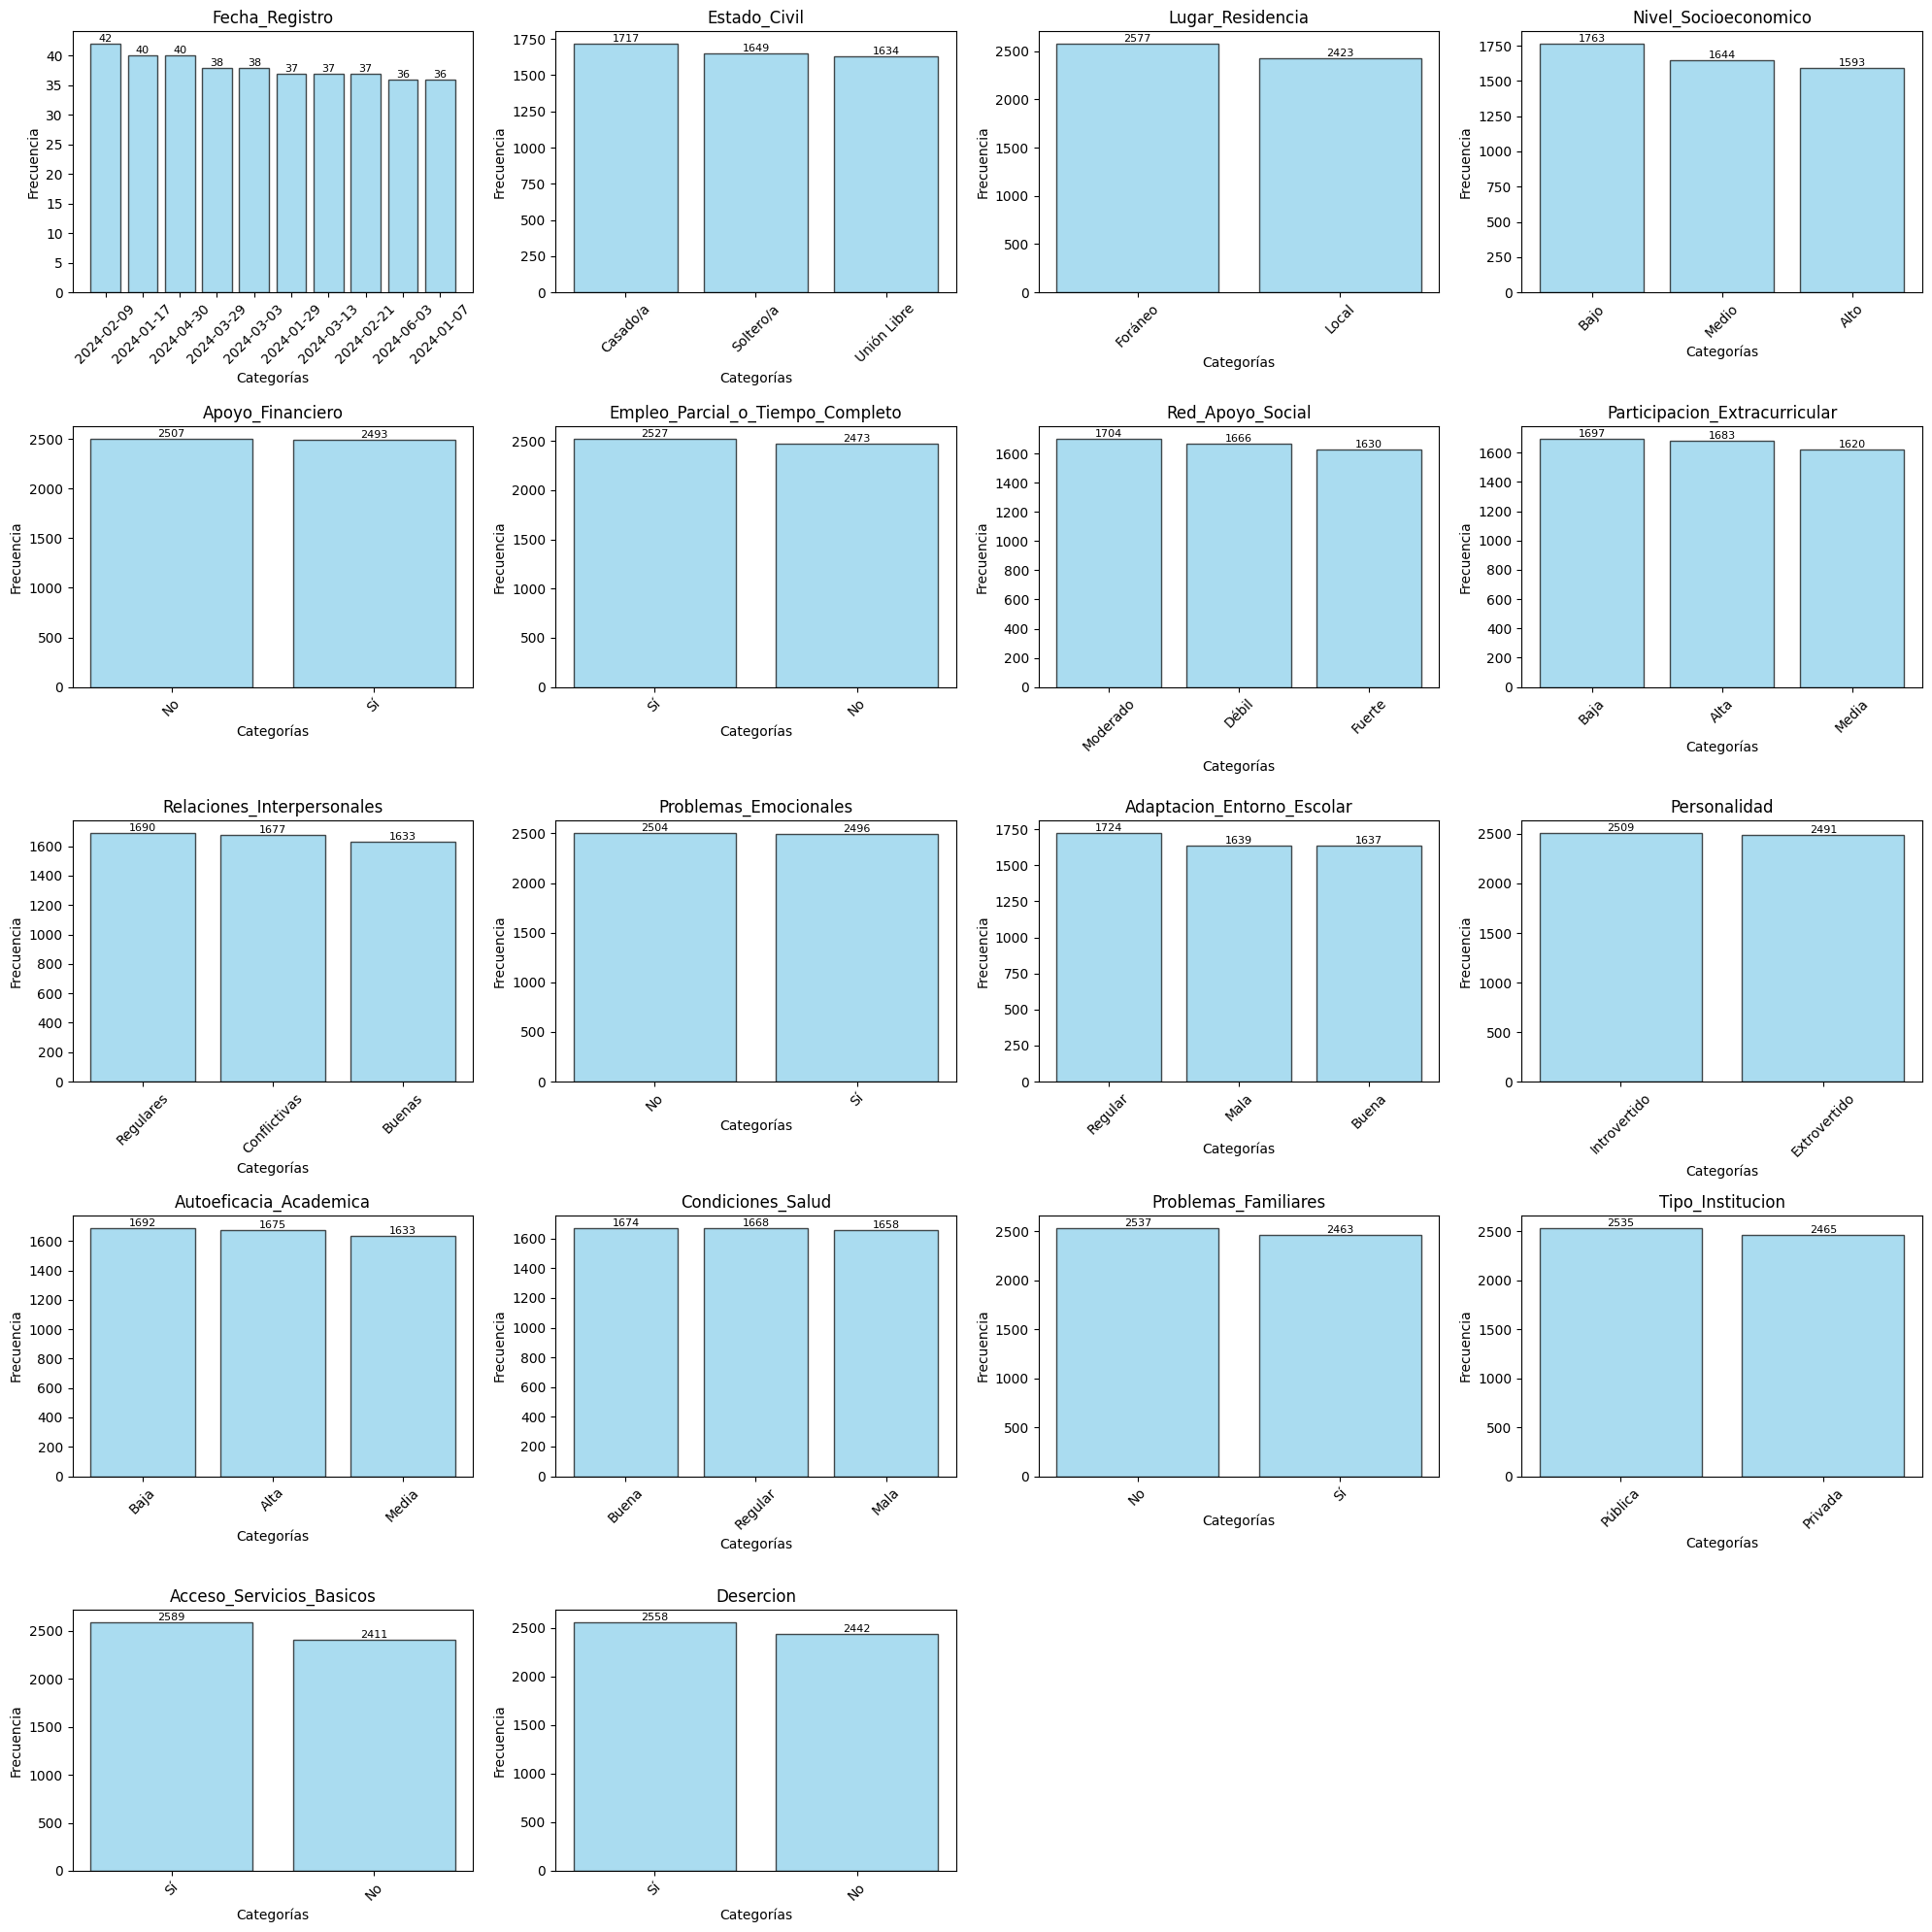

In [ ]:
columnas_categoricas = datos_transformados.select_dtypes(include=['object', 'category']).columns.tolist()
print(columnas_categoricas)
f_barra_multiple_matriz (datos_transformados, variables=columnas_categoricas, color='skyblue', mostrar='primeros')

## Estado civil

60% soltero, 20% casado, 20% union libre


In [ ]:
np.random.seed(2025)
# Estado_Civil
categorias = ['CASADO', 'SOLTERO', 'UNION LIBRE']
probabilidades = [0.20, 0.60, 0.20]  # La suma 1,
# Generar valores aleatorios con las probabilidades ajustadas
datos_transformados['Estado_Civil'] = np.random.choice(categorias, size=n, p=probabilidades)

# Lugar_Residencia
categorias = ['FORÁNEO', 'LOCAL']
probabilidades = [0.30, 0.70]  # La suma 1,
datos_transformados['Lugar_Residencia'] = np.random.choice(categorias, size=n, p=probabilidades)

# Nivel_Socioeconomico
categorias = ['ALTO', 'MEDIO', 'BAJO']
probabilidades = [0.10, 0.70, 0.20]  # La suma 1,
datos_transformados['Nivel_Socioeconomico'] = np.random.choice(categorias, size=n, p=probabilidades)

# Apoyo_Financiero
categorias = ['NO', 'SI']
probabilidades = [0.60, 0.40]  # La suma 1,
datos_transformados['Apoyo_Financiero'] = np.random.choice(categorias, size=n, p=probabilidades)

# Empleo_Parcial_o_Tiempo_Completo
categorias = ['NO', 'SI']
probabilidades = [0.80, 0.20]  # La suma 1,
datos_transformados['Empleo_Parcial_o_Tiempo_Completo'] = np.random.choice(categorias, size=n, p=probabilidades)


# Red_Apoyo_Social
categorias = ['DEBIL', 'MODERADO','FUERTE']
probabilidades = [0.50, 0.30, 0.20]  # La suma 1,
datos_transformados['Red_Apoyo_Social'] = np.random.choice(categorias, size=n, p=probabilidades)


# Participacion_Extracurricular
categorias = ['BAJA', 'ALTA','MEDIA']
probabilidades = [0.30, 0.20, 0.50]  # La suma 1,
datos_transformados['Participacion_Extracurricular'] = np.random.choice(categorias, size=n, p=probabilidades)

# Problemas_Emocionales
categorias = ['NO', 'SI']
probabilidades = [0.40, 0.60]  # La suma 1,
datos_transformados['Problemas_Emocionales'] = np.random.choice(categorias, size=n, p=probabilidades)


# Relaciones_Interpersonales
categorias = ['CONFLICTIVAS', 'REGULARES','BUENAS']
probabilidades = [0.30, 0.50, 0.20]  # La suma 1,
datos_transformados['Relaciones_Interpersonales'] = np.random.choice(categorias, size=n, p=probabilidades)


# Condiciones_Salud
categorias = ['BUENA', 'REGULAR','MALA']
probabilidades = [0.30, 0.50, 0.20]  # La suma 1,
datos_transformados['Condiciones_Salud'] = np.random.choice(categorias, size=n, p=probabilidades)

# Problemas_Familiares
categorias = ['NO', 'SI']
probabilidades = [0.40, 0.60]  # La suma 1,
datos_transformados['Problemas_Familiares'] = np.random.choice(categorias, size=n, p=probabilidades)



# Tipo_Institucion
categorias = ['PUBLICA', 'PRIVADA']
probabilidades = [0.70, 0.30]  # La suma 1,
datos_transformados['Tipo_Institucion'] = np.random.choice(categorias, size=n, p=probabilidades)


# Acceso_Servicios_Basicos
categorias = ['NO', 'SI']
probabilidades = [0.30, 0.70]  # La suma 1,
datos_transformados['Acceso_Servicios_Basicos'] = np.random.choice(categorias, size=n, p=probabilidades)


# Desercion
categorias = ['NO', 'SI']
probabilidades = [0.50, 0.50]  # La suma 1,
datos_transformados['Desercion'] = np.random.choice(categorias, size=n, p=probabilidades)


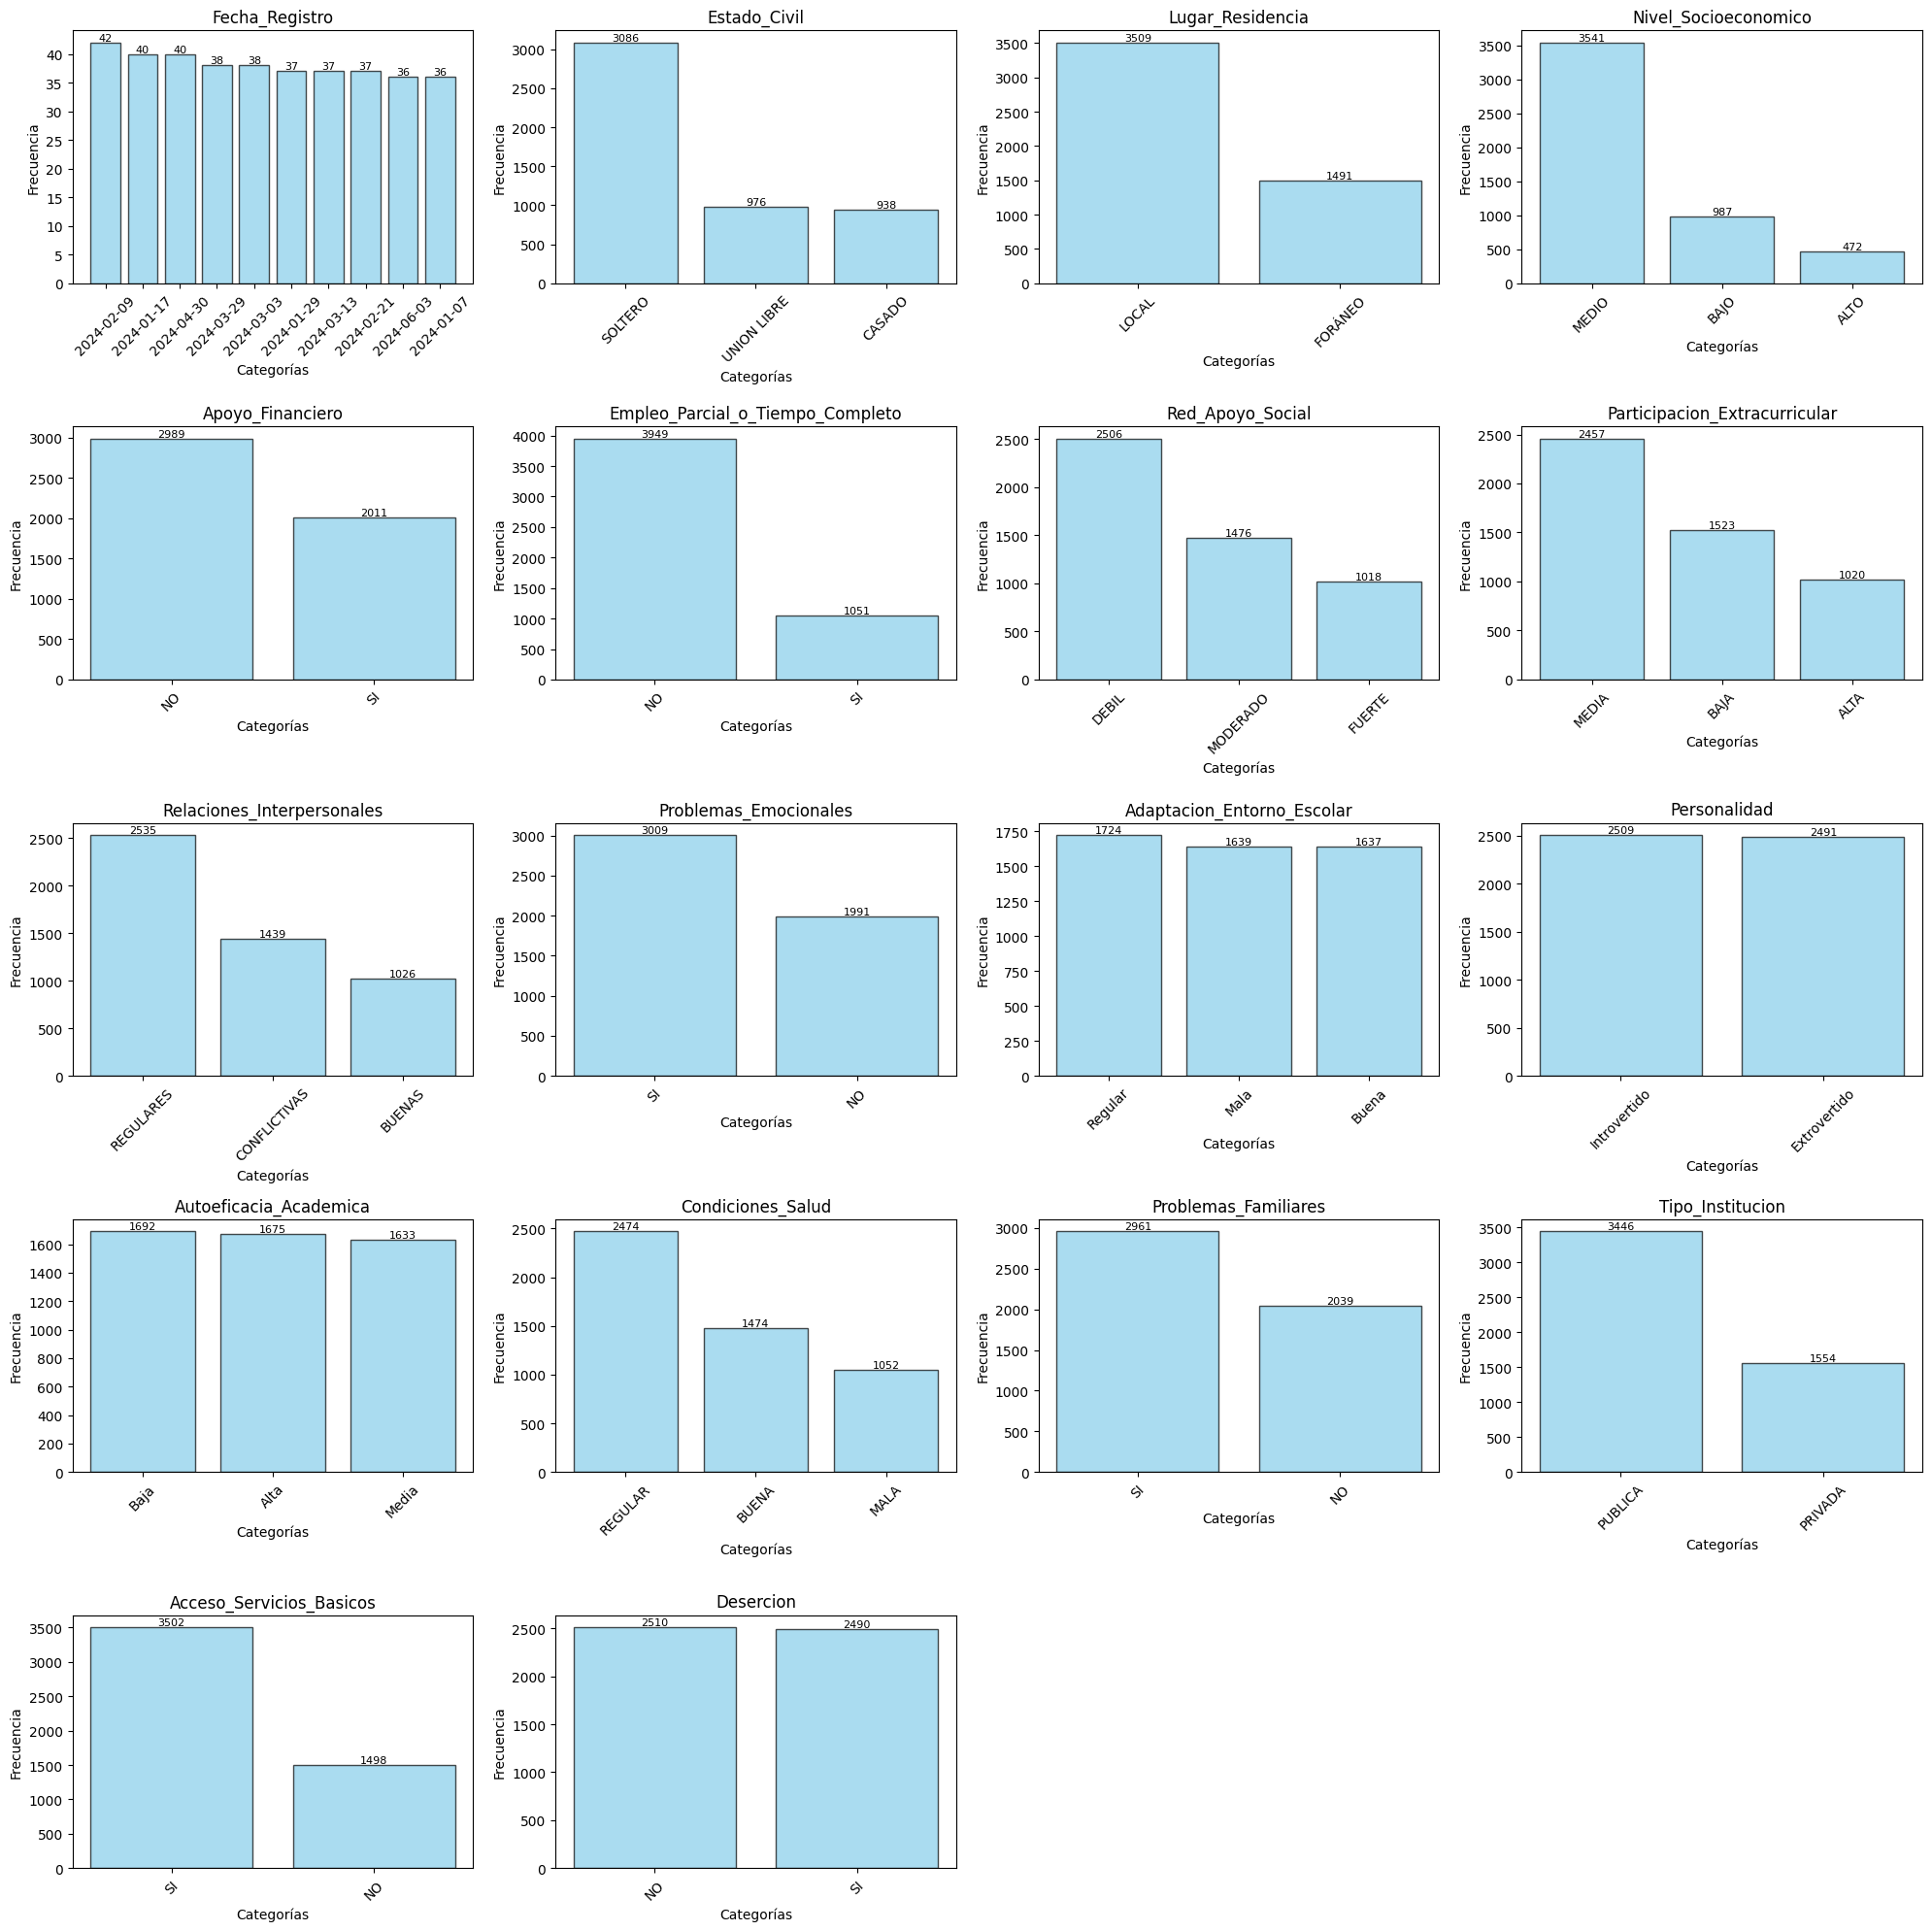

In [ ]:
f_barra_multiple_matriz (datos_transformados, variables=columnas_categoricas, color='skyblue', mostrar='primeros')

In [ ]:
# Guardar el DataFrame en un archivo CSV
datos_transformados.to_csv('datos_desercion_estudiantil_completo_transformado.csv', index=False)

print("El archivo 'datos_desercion_estudiantil_completo_transformado.csv' ha sido creado.")

El archivo 'datos_desercion_estudiantil_completo_transformado.csv' ha sido creado.
